In [77]:
### Getting Started ###

import requests
#import the CSVs
lady_potty_csv = requests.get("https://andrewnc.github.io/lady_potty.csv").text

# Example Code
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

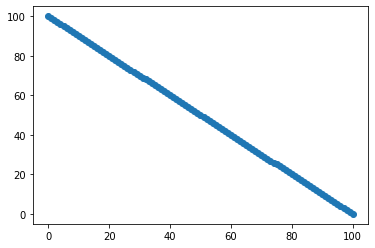

In [29]:
#############################---Exercise 1 Start---###################################
'''
  Create a scatter plot of a single diagonal line from the top left corner to the bottom right corner. 
  You can use numpy, but it can also be done without using numpy.
'''
x = np.array([i for i in range(0, 101)])
y = np.array([i for i in range(100, -1, -1)])

plt.scatter(x,y)
plt.show()
######################################################################################

In [41]:
#############################---Exercise 2 Start---###################################
'''
  Find the best combination (subjective) of columns to display the separation between classes of flower.
  Write a few sentences in a text box explaining your choice.
'''
import statsmodels.api as sm
import pandas as pd
df = sm.datasets.get_rdataset('iris').data

petalWidth = np.array(df['Petal.Width'])
petalLength = np.array(df['Petal.Length'])
petalSurfaceArea = np.array(petalWidth * petalLength)

df['Petal.SurfaceArea'] = petalSurfaceArea
df = df.reindex(columns=['Sepal.Length','Sepal.Width', 'Petal.Length', 'Petal.Width', 'Petal.SurfaceArea', 'Species'])

print("I chose to categorize the classes of flower by their total petal surface area.")
print("Why? Because flowers petals are what are pretty and all I care about in a flower.")
print("So let's see which flower has the largest petal surface area. This will also help us distinguish between flower speices.")

import plotly.express as px
px.scatter(df, x='Species', y='Petal.SurfaceArea', color='Species')
######################################################################################

I chose to categorize the classes of flower by their total petal surface area.
Why? Because flowers petals are what are pretty and all I care about in a flower.
So let's see which flower has the largest petal surface area. This will also help us distinguish between flower speices.


In [80]:
#############################---Exercise 3 Start---###################################
'''
  Load lady_potty.csv into a pandas data frame. It should have been loaded onto your remote Colab computer in the very first line.
  If not, run the following command !wget https://andrewnc.github.io/lady_potty.csv to download the data
  This data comes from a friend’s dog named Lady. We recorded her bathroom trips over the course of a few weeks to see if there was a trend to her business.
  It was mostly because she liked to go out multiple times per day, and we wanted to see if there was a better time for us to take her out.
'''

def timeStrToObj(string):
    date_time_obj = dt.datetime.strptime(string, '%Y-%m-%d %H:%M:%S.%f')
    return date_time_obj

# Make data into lists
headers = lady_potty_list[0].split(',')
potty_data = []
# Cast into the appropriate data types
for row in lady_potty_list[1:]:
    row = row.split(',')
    row[0] = int(row[0])
    row[3] = int(row[3])
    row[4] = int(row[4])
    row[5] = int(row[5])
    timeAsString = row[1]
    timeObj = timeStrToObj(timeAsString)
    row[1] = timeObj
    potty_data.append(row)

# Prepare the dataframe
indexData = [i for i in range(len(potty_data))]
potty_df = pd.DataFrame(data=potty_data, index=indexData, columns=headers)
######################################################################################

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



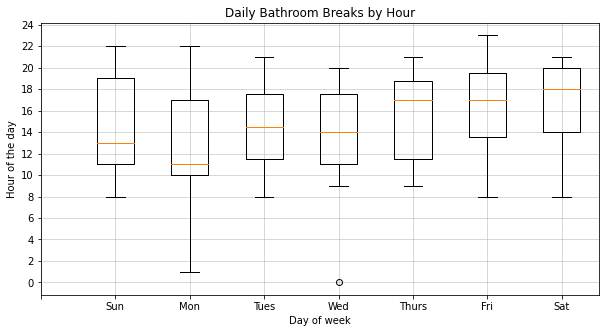

In [131]:
#############################---Exercise 4 Start---###################################
'''
  Create a box plot for 24 hour periods to visualize the trend of Lady's potty breaks.
  Make sure the xticks, xlabel, ylabel, and title are all tidy and well labeled.
'''

sun = []
mon = []
tues = []
wed = []
thur = []
fri = []
sat = []

for row in potty_data:
  hour = row[1].hour
  day = row[2]
  if day == 'sun':
    sun.append(hour)
  elif day == 'mon':
    mon.append(hour)
  elif day == 'tues':
    tues.append(hour)
  elif day == 'wed':
    wed.append(hour)
  elif day == 'thur':
    thur.append(hour)
  elif day == 'fri':
    fri.append(hour)
  else: # sat
    sat.append(hour)


columns = [sun, mon, tues, wed, thur, fri, sat]


fig, ax = plt.subplots()
ax.boxplot(columns)

fig.set_figwidth(10)
fig.set_figheight(5)

plt.suptitle('')
plt.title('Daily Bathroom Breaks by Hour')
plt.xlabel('Day of week')
plt.xticks(np.arange(8), ['', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'])  # Set text labels.
plt.ylabel('Hour of the day')
plt.yticks(np.arange(0, 25, 2))
plt.grid(linewidth=.5)
plt.show()
######################################################################################

In [132]:
#############################---Exercise 5 Start---###################################
'''
  Write what you observe from the boxplot data about my dog's potty behavior
'''

print("I observe that your dog basically never goes to the bathroom before 8am. Except for some reason, Monday morning tends to require an earlier potty break in the day than other weeks.")
print("I observe that on Thursday, Friday, and Saturdays, your dog usally takes a potty break around 5pm-6pm (this is the median time).")

I observe that your dog basically never goes to the bathroom before 8am. Except for some reason, Monday morning tends to require an earlier potty break in the day than other weeks.
I observe that on Thursday, Friday, and Saturdays, your dog usally takes a potty break around 5pm-6pm (this is the median time).
